<a href="https://colab.research.google.com/github/CdeCMx-org/proyectos-2021-club_19_3/blob/main/An%C3%A1lisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis de datos de la encuesta sobre consumo de pescado**

*Para comenzar es necesario aclarar que hicimos una limpieza de los datos en excel, ya que habían 3 personas cuyo grupo de edad era muy alto (50-60 años) por lo tanto, esto afectaría el promedio de nuestra edad. Nos enfocamos en un grupo de personas jóvenes. Los datos fueron depurados el día 19 de agosto de 2021 a las 5 de la tarde, se subieron a Github a las 7 pm aprox.*

*Nota: En cuanto a deficiones usadas:*

*Consumidor frecuente o habitual es aquel que come pescado al menos 1 vez al mes o más. Personas que consumen "casi nunca" o no lo hacen no son tomados en cuenta para ciertas estadísticas.*

In [ ]:
#Llamado de pandas y numpy
import pandas as pnd
import numpy as nmp


In [ ]:
url="https://raw.githubusercontent.com/CdeCMx-org/proyectos-2021-club_19_3/main/data/EncuestaRespuestas.csv"
dfr=pnd.read_csv(url)
#Hasta este punto ya se guardaron las respuestas en Python

In [ ]:
dfr

,Edad,Frecsem,Presentacion,conocebeneficios,conoceprocedencia
0,18,1,"Pescado fresco, Pescado congelado",si,No
1,20,4,"En conserva (latas, salmuera, tipo surimi)",si,No
2,19,0,Pescado congelado,si,No
3,22,0,Pescado congelado,No,No
4,17,0,"Pescado fresco, En conserva (latas, salmuera, ...",No pero quisiera saber,No
...,...,...,...,...,...
108,20,4,Pescado fresco,si,si
109,20,1,"Pescado fresco, En conserva (latas, salmuera, ...",si,No
110,20,0,Pescado fresco,No pero quisiera saber,si
111,19,2,"En conserva (latas, salmuera, tipo surimi)",si,si


#Edad
Analizar el grupo de edad es importante ya que con estos datos se obtendrán
- rango de la encuesta
- promedio de edad del grupo

In [ ]:
#Promedio de edad del grupo analizado
dfr.Edad.mean()

21.61061946902655

In [ ]:
#Edad más grande en el grupo de datos
dfr.Edad.max()

43

In [ ]:
#Edad más pequeña en el grupo de datos
dfr.Edad.min()

15

#Promedio de frecuencia de consumo
Aquí es importante aclarar que las respuestas fueron adaptadas para que se pudieran promediar, esto como **consumo base mes**; es decir, las respuestas que tenían "no consumo" tienen un número 0, mientras que la de "1 vez cada 15 días" se interpretó como 2 veces al mes ("1 vez al mes" se dejó como "1" y la opción de "1 vez por semana" se tradujo a "4" veces por mes).

In [ ]:
#Promedio de consumo por mes
dfr.Frecsem.mean()

1.8495575221238938

#Consumidores analizados
Para poder analizar las preferencias de los consumidores habituales en sí, separamos un dataset exclusivo de consumidores.

In [ ]:
dfr["Frecsem"]!=0
dfr_consume=dfr[dfr["Frecsem"]!=0]
dfr_consume

,Edad,Frecsem,Presentacion,conocebeneficios,conoceprocedencia
0,18,1,"Pescado fresco, Pescado congelado",si,No
1,20,4,"En conserva (latas, salmuera, tipo surimi)",si,No
5,26,4,"Pescado fresco, Pescado congelado",si,No
6,24,2,Pescado fresco,si,si
8,19,1,Pescado fresco,No pero quisiera saber,No
...,...,...,...,...,...
107,22,1,"Pescado fresco, Pescado congelado",si,No
108,20,4,Pescado fresco,si,si
109,20,1,"Pescado fresco, En conserva (latas, salmuera, ...",si,No
111,19,2,"En conserva (latas, salmuera, tipo surimi)",si,si


#Conocimiento de beneficios del consumo de productos pesqueros
Con la definición de la variable dfr.conocebeneficios se puede hacer una resta entre las personas totales (113) menos las que sí conocen los beneficios y poder calcular las que no los conocen.
Se hace así porque también incluimos la opción de "no conozco pero me interesa", la cual será estudiada después. Esta es la primer "división" (por llamarlo de alguna manera) de nuestro conjunto de datos.
La ventaja es que directamente te dice las dimensiones de la nueva lista, entonces no hace falta programar un contador (￣y▽,￣)╭ 

In [ ]:
dfr.conocebeneficios

0                          si
1                          si
2                          si
3                          No
4      No pero quisiera saber
                ...          
108                        si
109                        si
110    No pero quisiera saber
111                        si
112                        si
Name: conocebeneficios, Length: 113, dtype: object

In [ ]:
#Número de personas que sí conoce los beneficios del consumo de productos pesqueros
dfr["conocebeneficios"]=="si"
dfr_siconoce=dfr[dfr["conocebeneficios"]=="si"]
dfr_siconoce
#len(dfr_siconoce) #Lo dejo como comentario ya que hasta el final se puede visualizar el tamaño de la lista, se puede ejecutar si se quiere ahorrar espacio

,Edad,Frecsem,Presentacion,conocebeneficios,conoceprocedencia
0,18,1,"Pescado fresco, Pescado congelado",si,No
1,20,4,"En conserva (latas, salmuera, tipo surimi)",si,No
2,19,0,Pescado congelado,si,No
5,26,4,"Pescado fresco, Pescado congelado",si,No
6,24,2,Pescado fresco,si,si
...,...,...,...,...,...
107,22,1,"Pescado fresco, Pescado congelado",si,No
108,20,4,Pescado fresco,si,si
109,20,1,"Pescado fresco, En conserva (latas, salmuera, ...",si,No
111,19,2,"En conserva (latas, salmuera, tipo surimi)",si,si


In [ ]:
#Ahora veamos cuánta gente de los consumidores habituales realmente conoce los beneficios 
dfr_consume["conocebeneficios"]=="si"
dfr_consumeysabe=dfr_consume[dfr_consume["conocebeneficios"]=="si"]
dfr_consumeysabe
len(dfr_consumeysabe)

63

#Conocimiento de la procedencia de los alimentos
Debido a que la ODS 12 es sobre consumo responsable, quisimos hacer hincapié en esta parte en donde **los consumidores sí que tenemos poder**. Básicamente se hace el mismo procedimiento que con la parte de "beneficios". Aquí también es muy importante analizar si se eligió "no y no me interesa" ya que eso puede llegar a ser alarmante dependiendo el tipo de consumo de pescado que ese grupo de personas tenga y la frecuencia con que lo haga.

In [ ]:
#Número de personas que sí sabe de dónde provienen sus alimentos
dfr["conoceprocedencia"]=="si"
dfr_sisabe=dfr[dfr["conoceprocedencia"]=="si"]
dfr_sisabe
#len(dfr_sisabe) #Lo dejo como comenatrio ya que hasta el final se puede visualizar el tamaño de la lista, se puede ejecutar si se quiere ahorrar espacio

,Edad,Frecsem,Presentacion,conocebeneficios,conoceprocedencia
6,24,2,Pescado fresco,si,si
9,21,0,"Pescado fresco, Pescado congelado, En conserva...",No pero quisiera saber,si
10,16,0,"En conserva (latas, salmuera, tipo surimi)",si,si
11,20,4,Pescado fresco,si,si
12,20,2,Pescado fresco,No pero quisiera saber,si
...,...,...,...,...,...
104,21,0,Pescado fresco,si,si
105,21,1,Pescado fresco,si,si
108,20,4,Pescado fresco,si,si
110,20,0,Pescado fresco,No pero quisiera saber,si


In [ ]:
#Número de personas a las que no les interesa de dónde provienen sus alimentos
#OBSERVAR FRECUENCIA DE CONSUMO
dfr["conoceprocedencia"]=="No y no me interesa"
dfr_noint=dfr[dfr["conoceprocedencia"]=="No y no me interesa"]
dfr_noint

,Edad,Frecsem,Presentacion,conocebeneficios,conoceprocedencia
70,19,0,"En conserva (latas, salmuera, tipo surimi)",No pero quisiera saber,No y no me interesa


In [ ]:
#Ahora veamos cuánta gente de los consumidores habituales sabe de dónde vienen los productos 
dfr_consume["conoceprocedencia"]=="si"
dfr_consumeysabepr=dfr_consume[dfr_consume["conoceprocedencia"]=="si"]
dfr_consumeysabepr
len(dfr_consumeysabepr)

46

#Consumo de pescado fresco
Por último, se hace el análisis del tipo de consumo de pescado **enfocándonos en los consumidores habituales**, ya que, con lo aprendido en el club, nos dimos cuenta que los mayores beneficios los otorga el pescado fresco. Queremos saber cuánta gente que come pescado frecuentemente (más de 1 vez al mes) se pierde de los beneficios de este alimento. El objetivo es incentivar mucho más su consumo y tener una justificación para hacerlo.


In [ ]:
#Personas que consumen pescado fresco
dfr_consume["Presentacion"]=="Pescado fresco" 
dfr_fresco = dfr_consume[dfr_consume["Presentacion"]=="Pescado fresco"] 
dfr_fresco
len(dfr_fresco)

44

In [ ]:
dfr_consume["Presentacion"]=="Pescado fresco, En conserva (latas, salmuera, tipo surimi)"
dfr_frescoconserva=dfr_consume[dfr_consume["Presentacion"]=="Pescado fresco, En conserva (latas, salmuera, tipo surimi)"]
dfr_frescoconserva
len(dfr_frescoconserva)

7

In [ ]:
dfr_consume["Presentacion"]=="Pescado fresco, Pescado congelado"
dfr_frescocong=dfr_consume[dfr_consume["Presentacion"]=="Pescado fresco, Pescado congelado"]
dfr_frescocong
len(dfr_frescocong)

10

In [ ]:
dfr_consume["Presentacion"]=="Pescado fresco, Pescado congelado, En conserva (latas, salmuera, tipo surimi)"
dfr_frescocongcons=dfr_consume[dfr_consume["Presentacion"]=="Pescado fresco, Pescado congelado, En conserva (latas, salmuera, tipo surimi)"]
dfr_frescocongcons
len(dfr_frescocongcons)

9

#Ahora es tiempo de interpretar lo que obtuvimos
Un dato de interés es conocer el rango de edad, planeado para jóvenes y adultos.
Los resultados arrojan que **las personas encuestadas son de 15 a 43 años**.
El promedio de edad es de 21 años, así que nos encontramos con un grupo bastante joven de personas; casi todas de nuestra edad.

El **promedio de consumo es de 2 veces por mes** (1.85), es decir, 1 vez cada 15 días. Lo cual *no está tan mal según lo que aprendimos en el club*, aunque *sí se debe de fomentar, ya que lo ideal es comer 1 vez por semana*.
> De igual interés son las **razones** por las cuales no se consume, dichos datos se leyeron en forma personal y se analizaron en una **discusión grupal**; las razones se expondrán en el página web.

El número de personas que **sí** conoce los benficios de comer pescado es de: 79. 
Si se hace la resta, (113-79=34), 34 personas no conocen los beneficios de consumir productos pesqueros. Traducido a pocentaje es el 30% de encuestados que no conoce los beneficios.

Los **consumidores habituales** encontrados en una densidad de 113 encuestados es de **86** personas. 

Dentro de los consumidores habituales se nos hizo de interés conocer cuántos
- conocen los beneficios
- consumen pescado fresco

Tomando el total de 86, vemos que 
- 63 consumidores habituales conocen los beneficios (73.3%)
- 70 consumidores habituales consumen pescado fresco (81.4%)

Otro punto a analizar fue el conocimiento de la procedencia de los alimentos pesqueros. Este se hizo tanto con el público en general de la encuesta como con los consumidores habituales debido a que
- las personas debemos de saber de dónde provienen los alimentos, independientemente de si los consumimos o no, para poder orientar a nuestros familiares o amigos acerca de las mejores opciones de consumo y poder llegar a hacer conciencia colectiva
- con los consumidores, es un tanto obvio, el poder **elegir bien** qué cosa compramos y qué tipo de comercio y producción estamos propiciando (aunque claro, la responsabilidad de que haya sobrepesca no recae en una sola persona o un sólo grupo, es algo mucho más complejo, pero podemos empezar por acá)

Los resultados fueron:
- Sólo 61 *personas encuestadas* conocen de dónde provienen los alimentos (53%)
- 46 *consumidores habituales* conocen la procedencia (53%)

Cuando estábamos dándole una ojeada a los resultados, nos sorprendió ver que habían contestado "no y no me interesa" en la parte de "procedencia", así que decidimos analizar la postura de esa persona (más que nada para saber cómo poder hacer que sí le interesara) y nos dimos cuenta de que su consumo es 0 (no consume) así que no nos alarmó tanto la respuesta, ya que es algo que puede intuirse.





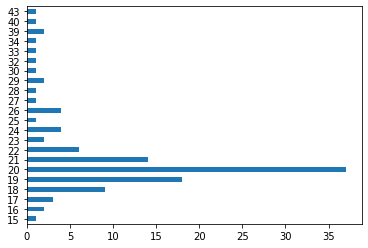

In [ ]:
serie_edad=dfr.Edad.value_counts()
serie_edad=serie_edad.sort_index(ascending=True)
serie_edad.plot.barh()


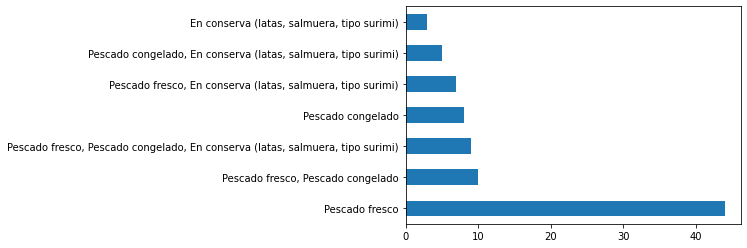

In [ ]:
serie_consumepres = dfr_consume.Presentacion.value_counts()
serie_consumepres.plot.barh()

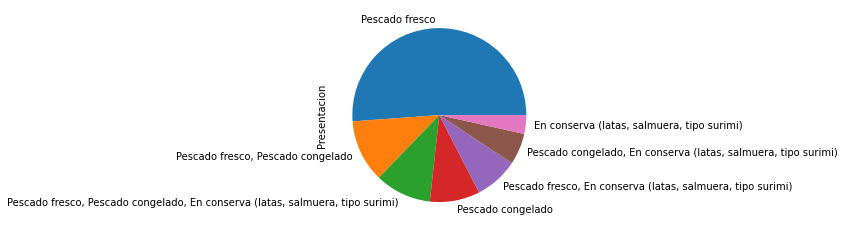

In [ ]:
serie_consumepres = dfr_consume.Presentacion.value_counts()
serie_consumepres.plot.pie()

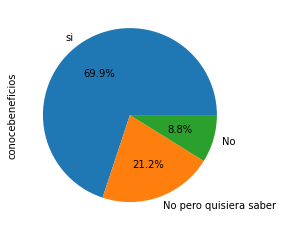

In [ ]:
import matplotlib.pyplot as plt
#Con esta gráfica podemos ver el interés de las personas
pastelbenef=dfr.conocebeneficios.value_counts()
pastelbenef.plot.pie(autopct='%1.1f%%')

#Conclusiones
Con todos estos datos recolectados

*Coded by Sphynx666*